**Instructor**: Prof. Keith Chugg (chugg@usc.edu)

**Teaching Assistant**: Alexios Rustom (arustom@usc.edu)

**Notebooks**: Written by Alexios Rustom (arustom@usc.edu)

#### Data Visualization was done on some of the dataset of homework 2:
* classification_synthetic_1.npz
* classification_synthetic_2.npz
* classification_synthetic_3.npz
* breast_cancer.npz
* regression_synthetic_1.npz
* regression_synthetic_2.npz

# **Homework 2**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler

In [2]:
def check_dimensions(x_train, x_test, y_train, y_test):
    print('Size of x_train dataset: ', x_train.shape)
    print('Size of y_train dataset: ', y_train.shape)
    print('Size of x_test dataset: ', x_test.shape)
    print('Size of y_test dataset: ', y_test.shape)

In [3]:
def check_nan(x_train, x_test, y_train, y_test):
    print('does x_train contain nan? ', np.isnan(np.sum(x_train)))
    print('does x_test contain nan? ', np.isnan(np.sum(x_test)))
    print('does y_train contain nan? ', np.isnan(np.sum(y_train)))
    print('does y_test contain nan? ', np.isnan(np.sum(y_test)))

In [4]:
def load_data_npz(npzfile, labels_train, labels_test):
    x_train = npzfile['x_train']; x_test = npzfile['x_test']; y_train = npzfile[labels_train]; y_test = npzfile[labels_test]
    check_dimensions(x_train, x_test, y_train, y_test)
    check_nan(x_train, x_test, y_train, y_test)
    return x_train, x_test, y_train, y_test

In [5]:
def plot_data(df_train, df_test):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
    col_2C_train = np.where(df_train['Label']==1,'r',np.where(df_train['Label']==2,'g', 'k'))
    ax1.scatter(df_train['X1'],df_train['X2'],c= col_2C_train, s=40, edgecolors='k')
    ax1.set_title('Train Dataset',fontsize=16)
    ax1.set_xlabel('X1', fontsize = 16)
    ax1.set_ylabel('X2', fontsize = 16)
    col_2C_test = np.where(df_test['Label']==1,'r',np.where(df_test['Label']==2,'g', 'k'))
    ax2.scatter(df_test['X1'],df_test['X2'],c= col_2C_test, s=40, edgecolors='k')
    ax2.set_title('Test Dataset',fontsize=16)
    ax2.set_xlabel('X1', fontsize = 16)
    ax2.set_ylabel('X2', fontsize = 16)
    plt.show()

In [6]:
def plot_histo_classes(df_train, df_test):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
    train_data_class_1 = df_train[df_train['Label'] == 1]
    train_data_class_2 = df_train[df_train['Label'] == 2]
    train_data_class_1_2 = {'Class 1': [train_data_class_1.shape[0]], 'Class 2': [train_data_class_2.shape[0]]}
    train_df_class_1_2 = pd.DataFrame(data=train_data_class_1_2)
    train_df_class_1_2.plot(kind='bar', ax=ax1, color={"Class 1": "red", "Class 2": "green"}, fontsize=16)
    ax1.set_title('Train Dataset', fontsize=16)
    ax1.set_xticks([])
    test_data_class_1 = df_test[df_test['Label'] == 1]
    test_data_class_2 = df_test[df_test['Label'] == 2]
    test_data_class_1_2 = {'Class 1': [test_data_class_1.shape[0]], 'Class 2': [test_data_class_2.shape[0]]}
    test_df_class_1_2 = pd.DataFrame(data=test_data_class_1_2)
    test_df_class_1_2.plot(kind='bar', ax=ax2, color={"Class 1": "red", "Class 2": "green"}, fontsize=16)
    ax2.set_title('Test Dataset', fontsize=16)
    ax2.set_xticks([])
    plt.show()

In [7]:
def create_dataframe(x_train, x_test, y_train, y_test, plot_flag = False):
    df_train = pd.DataFrame({'X1': x_train[:,0],'X2': x_train[:,1], 'Label': y_train})
    df_test = pd.DataFrame({'X1': x_test[:,0],'X2': x_test[:,1], 'Label': y_test})
    print("Total Null values count in train: ",df_train.isnull().sum().sum())
    print("Total Null values count in test: ",df_test.isnull().sum().sum())
    if (plot_flag):
        plot_data(df_train, df_test)
        plot_histo_classes(df_train, df_test)
    return df_train, df_test

## classification_synthetic_1.npz

In [8]:
input_file_1 = './hw2_data/classification_synthetic_1.npz'
npzfile_1 = np.load(input_file_1)
npzfile_1.files

['x_train', 'labels_train', 'x_test', 'labels_test']

In [9]:
x_train_1, x_test_1, y_train_1, y_test_1 = load_data_npz(npzfile_1, labels_train = "labels_train", labels_test = "labels_test")
np.unique(y_train_1, return_counts=True)

Size of x_train dataset:  (1000, 2)
Size of y_train dataset:  (1000,)
Size of x_test dataset:  (100, 2)
Size of y_test dataset:  (100,)
does x_train contain nan?  False
does x_test contain nan?  False
does y_train contain nan?  False
does y_test contain nan?  False


(array([1., 2.]), array([500, 500]))

Total Null values count in train:  0
Total Null values count in test:  0


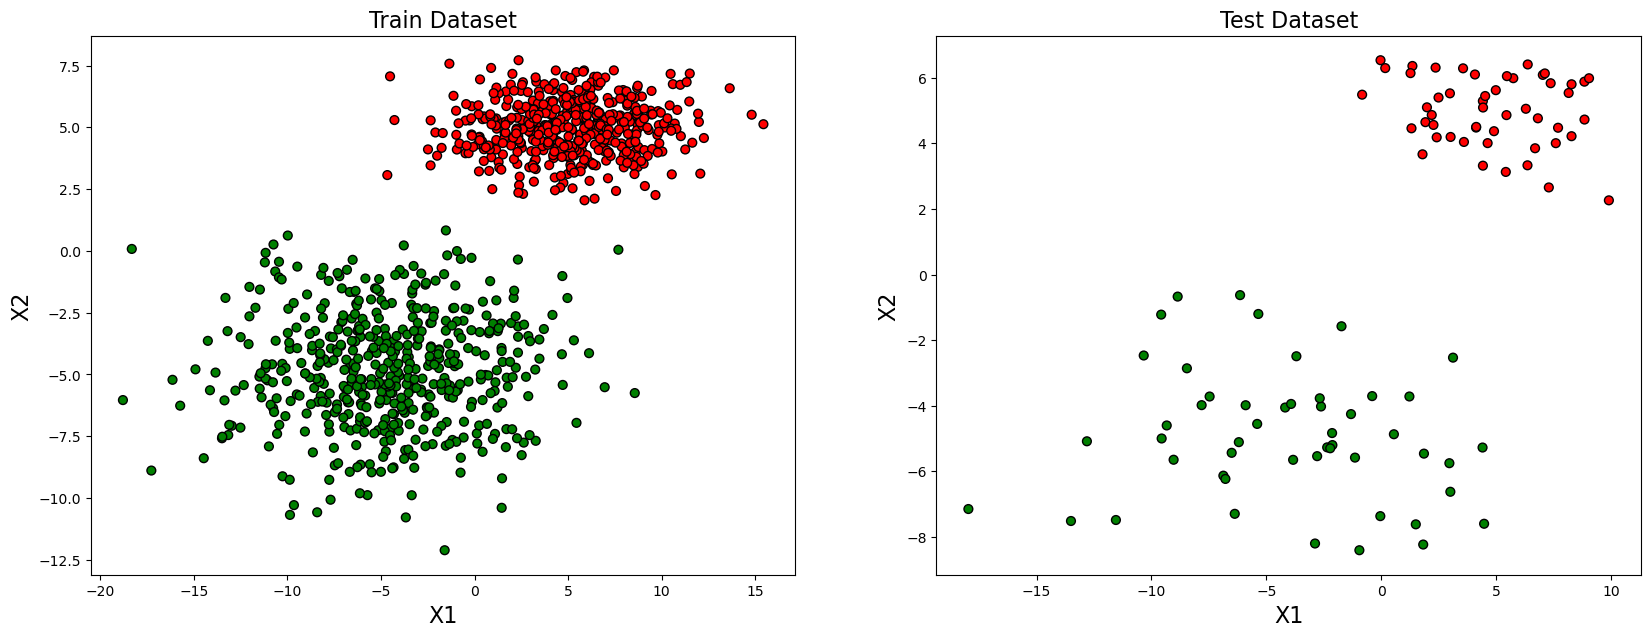

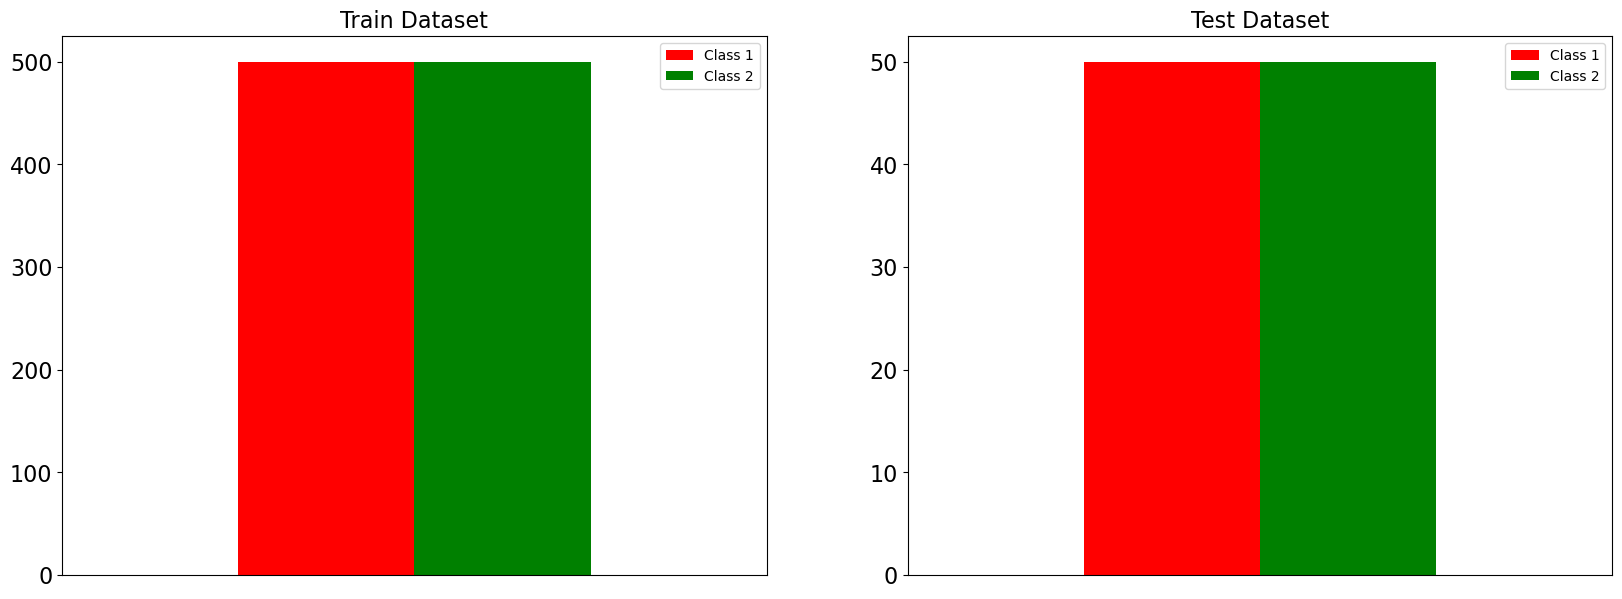

In [10]:
df_train_1, df_test_1 = create_dataframe(x_train_1, x_test_1, y_train_1, y_test_1, plot_flag = True)

## classification_synthetic_2.npz

In [12]:
input_file_2 = 'hw2_data/classification_synthetic_2.npz'
npzfile_2 = np.load(input_file_2)
x_train_2, x_test_2, y_train_2, y_test_2 = load_data_npz(npzfile_2, labels_train = "labels_train", labels_test = "labels_test")
np.unique(y_train_2, return_counts=True)


Size of x_train dataset:  (2000, 2)
Size of y_train dataset:  (2000,)
Size of x_test dataset:  (200, 2)
Size of y_test dataset:  (200,)
does x_train contain nan?  False
does x_test contain nan?  False
does y_train contain nan?  False
does y_test contain nan?  False


(array([1., 2.]), array([1000, 1000]))

Total Null values count in train:  0
Total Null values count in test:  0


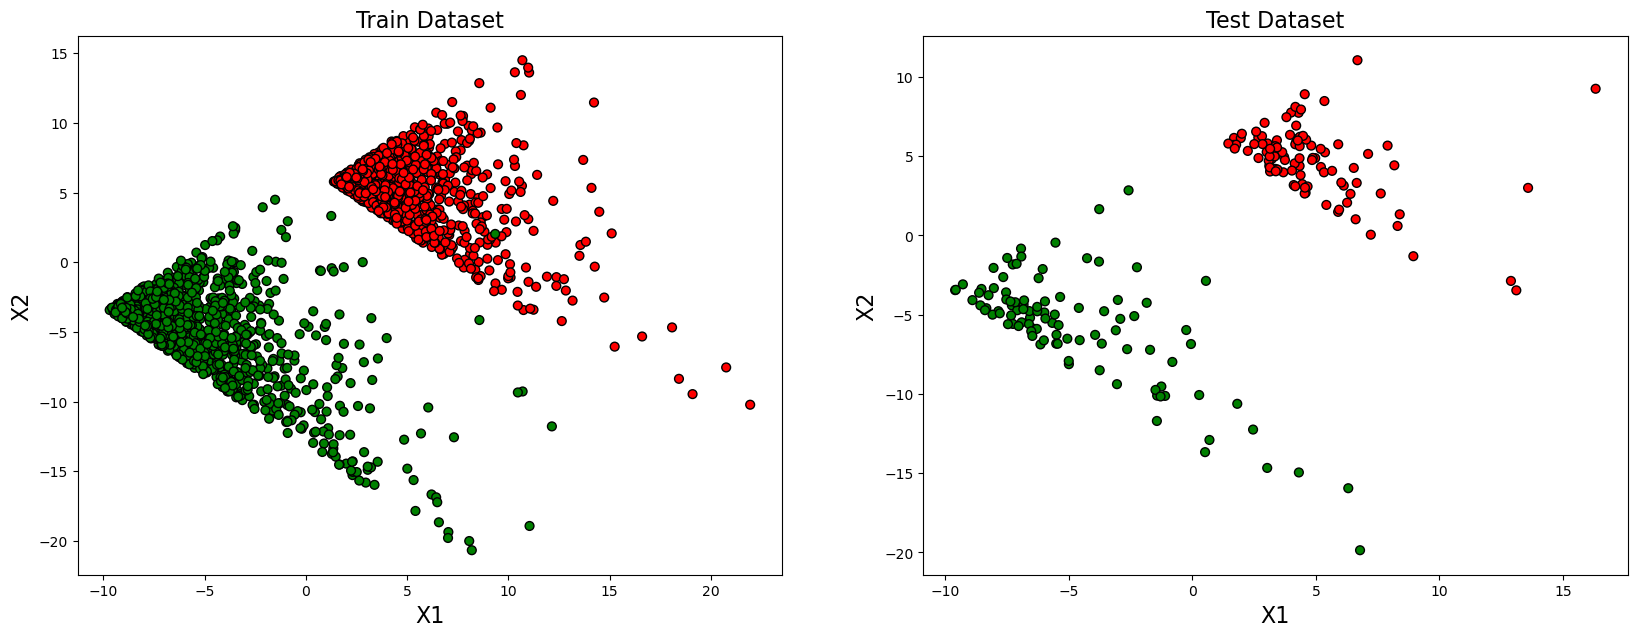

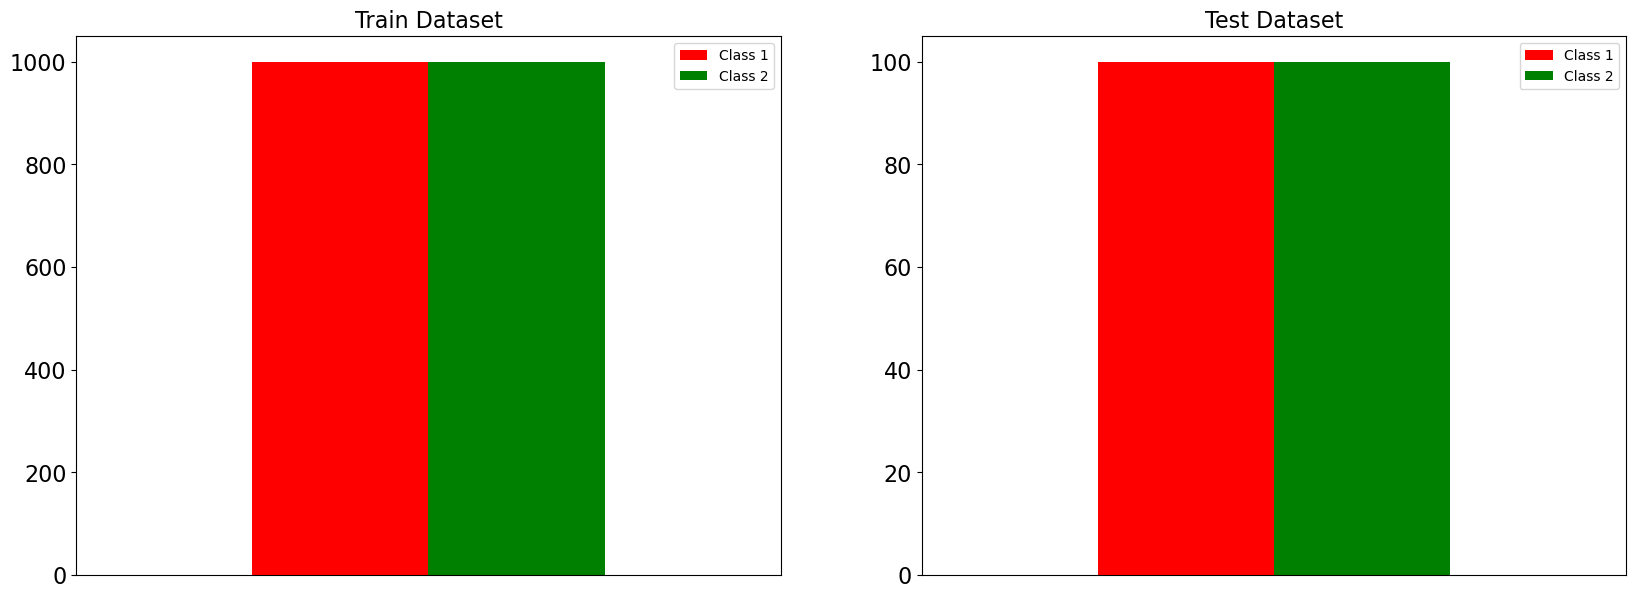

In [13]:
df_train_2, df_test_2 = create_dataframe(x_train_2, x_test_2, y_train_2, y_test_2, plot_flag = True)

## classification_synthetic_3.npz

In [15]:
input_file_3 = 'hw2_data/classification_synthetic_3.npz'
npzfile_3 = np.load(input_file_3)
x_train_3, x_test_3, y_train_3, y_test_3 = load_data_npz(npzfile_3, labels_train = "labels_train", labels_test = "labels_test")
npzfile_3.files
np.unique(y_train_3, return_counts=True)

Size of x_train dataset:  (2400, 2)
Size of y_train dataset:  (2400,)
Size of x_test dataset:  (400, 2)
Size of y_test dataset:  (400,)
does x_train contain nan?  False
does x_test contain nan?  False
does y_train contain nan?  False
does y_test contain nan?  False


(array([1., 2.]), array([1200, 1200]))

Total Null values count in train:  0
Total Null values count in test:  0


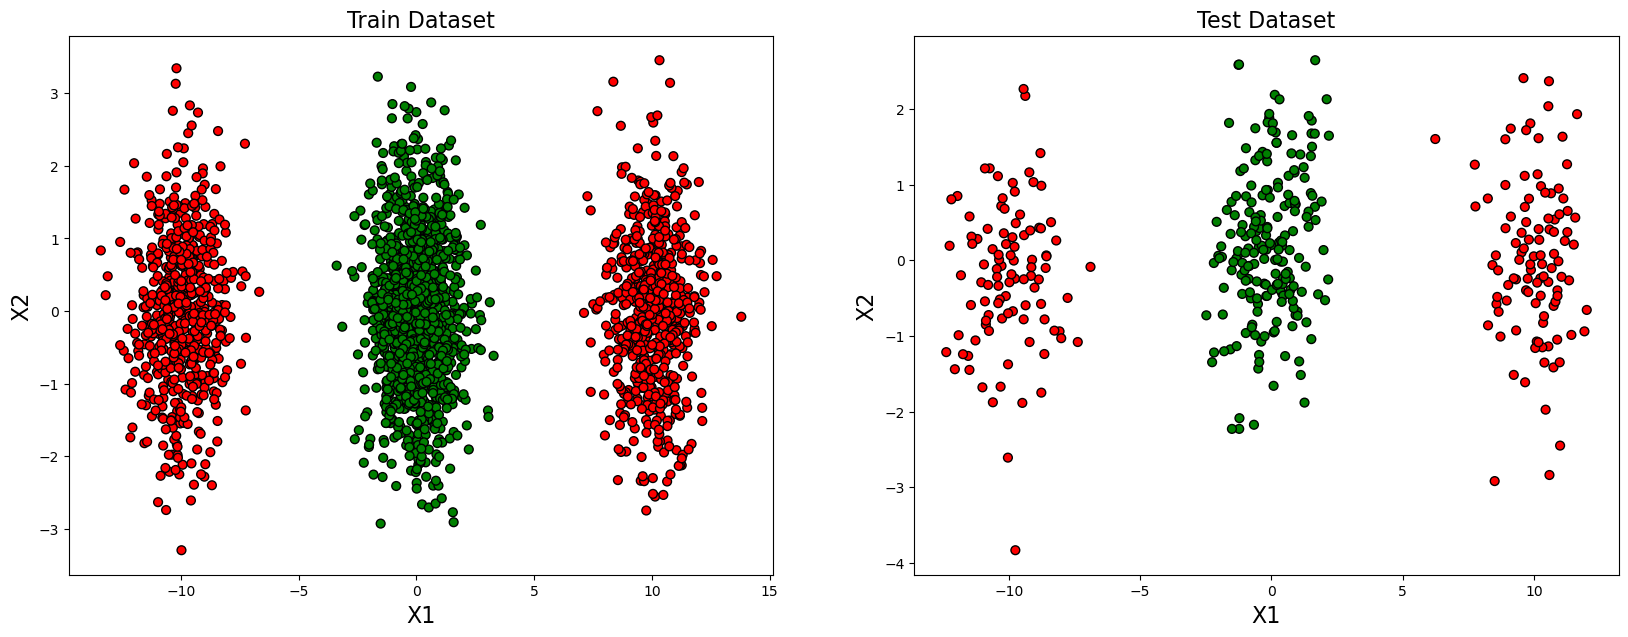

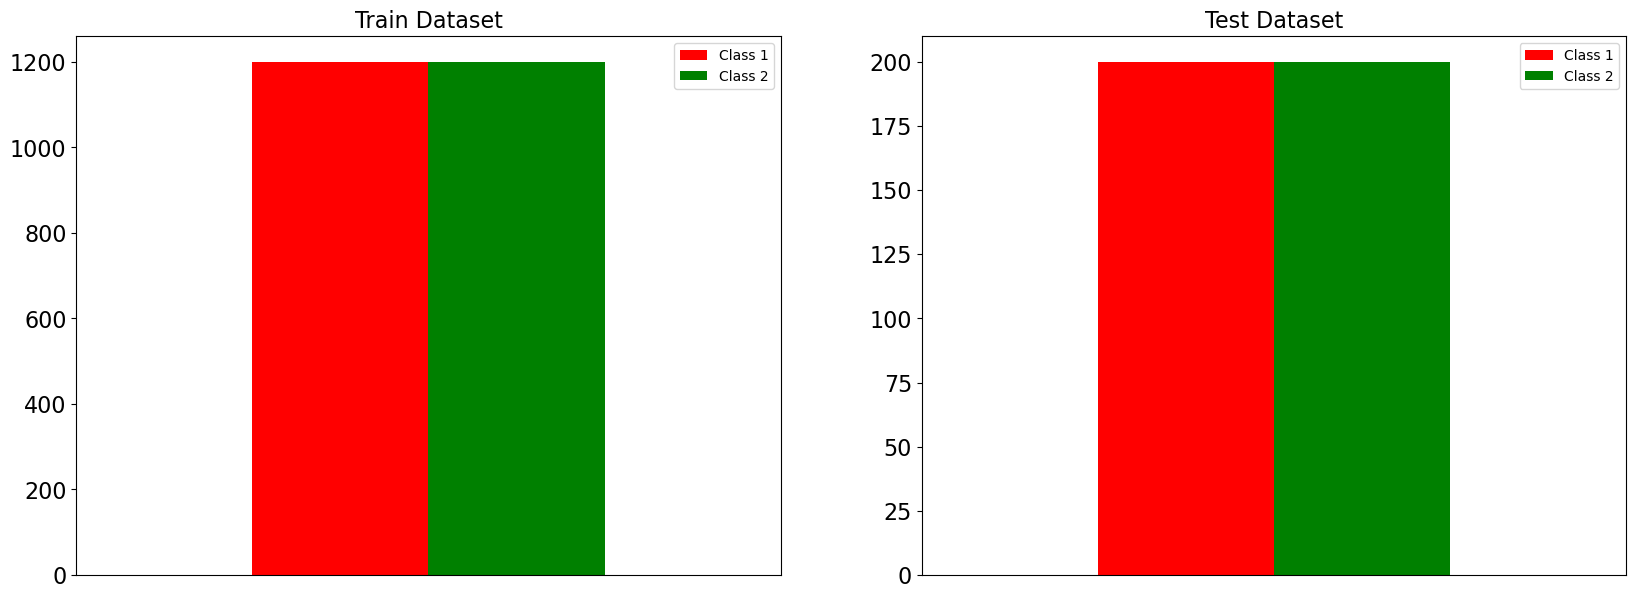

In [16]:
df_train_3, df_test_3 = create_dataframe(x_train_3, x_test_3, y_train_3, y_test_3, plot_flag = True)

## breast_cancer.npz

In [17]:
input_file_4 = 'hw2_data/breast_cancer.npz'
npzfile_4 = np.load(input_file_4)
x_train_4, x_test_4, y_train_4, y_test_4 = load_data_npz(npzfile_4, labels_train = "labels_train", labels_test = "labels_test")

Size of x_train dataset:  (480, 30)
Size of y_train dataset:  (480,)
Size of x_test dataset:  (89, 30)
Size of y_test dataset:  (89,)
does x_train contain nan?  False
does x_test contain nan?  False
does y_train contain nan?  False
does y_test contain nan?  False


In [18]:
column_names = [f"Feature {x}" for x in range(1,31)]
df_train_4 = pd.DataFrame(data = x_train_4, columns = column_names)
df_train_4['Label'] = y_train_4
df_test_4 = pd.DataFrame(data = x_test_4, columns = column_names)
df_test_4['Label'] = y_test_4

In [19]:
df_train_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Feature 1   480 non-null    float64
 1   Feature 2   480 non-null    float64
 2   Feature 3   480 non-null    float64
 3   Feature 4   480 non-null    float64
 4   Feature 5   480 non-null    float64
 5   Feature 6   480 non-null    float64
 6   Feature 7   480 non-null    float64
 7   Feature 8   480 non-null    float64
 8   Feature 9   480 non-null    float64
 9   Feature 10  480 non-null    float64
 10  Feature 11  480 non-null    float64
 11  Feature 12  480 non-null    float64
 12  Feature 13  480 non-null    float64
 13  Feature 14  480 non-null    float64
 14  Feature 15  480 non-null    float64
 15  Feature 16  480 non-null    float64
 16  Feature 17  480 non-null    float64
 17  Feature 18  480 non-null    float64
 18  Feature 19  480 non-null    float64
 19  Feature 20  480 non-null    f

In [20]:
df_test_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Feature 1   89 non-null     float64
 1   Feature 2   89 non-null     float64
 2   Feature 3   89 non-null     float64
 3   Feature 4   89 non-null     float64
 4   Feature 5   89 non-null     float64
 5   Feature 6   89 non-null     float64
 6   Feature 7   89 non-null     float64
 7   Feature 8   89 non-null     float64
 8   Feature 9   89 non-null     float64
 9   Feature 10  89 non-null     float64
 10  Feature 11  89 non-null     float64
 11  Feature 12  89 non-null     float64
 12  Feature 13  89 non-null     float64
 13  Feature 14  89 non-null     float64
 14  Feature 15  89 non-null     float64
 15  Feature 16  89 non-null     float64
 16  Feature 17  89 non-null     float64
 17  Feature 18  89 non-null     float64
 18  Feature 19  89 non-null     float64
 19  Feature 20  89 non-null     flo

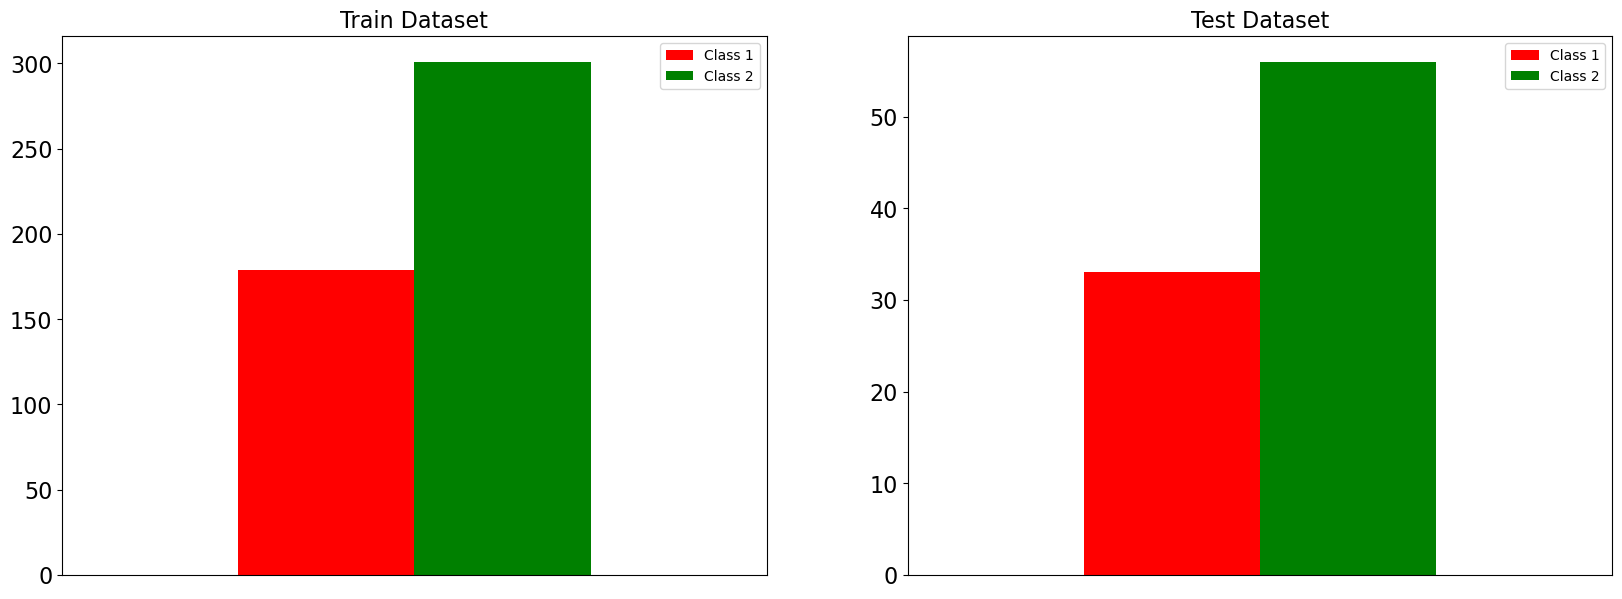

In [21]:
plot_histo_classes(df_train_4, df_test_4)

In [22]:
df_train_4.describe()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30,Label
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,...,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,14.117444,19.385146,91.924417,654.386250,0.096281,0.104961,0.089426,0.049276,0.181898,0.062931,...,25.793208,107.192646,876.861042,0.132562,0.256924,0.275046,0.115388,0.290870,0.084332,1.627083
std,3.563689,4.318155,24.576870,351.347121,0.014344,0.053761,0.079104,0.039252,0.027349,0.006992,...,6.126174,33.528378,548.127743,0.023325,0.161253,0.211840,0.066812,0.062384,0.018454,0.484085
min,6.981000,10.380000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.490000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210,1.000000
25%,11.667500,16.202500,74.832500,416.950000,0.085828,0.064315,0.029930,0.020147,0.163275,0.057807,...,21.375000,83.822500,512.000000,0.116600,0.147775,0.116700,0.064988,0.250900,0.071843,1.000000
50%,13.275000,19.055000,86.040000,545.650000,0.095825,0.095090,0.062650,0.033380,0.179950,0.061820,...,25.470000,97.615000,678.950000,0.131200,0.215700,0.229000,0.100550,0.282400,0.080075,2.000000
75%,16.022500,21.917500,104.400000,794.350000,0.105525,0.130525,0.132675,0.074320,0.196600,0.066393,...,30.127500,126.800000,1121.750000,0.146700,0.335150,0.386200,0.163150,0.318475,0.092535,2.000000
max,28.110000,39.280000,188.500000,2499.000000,0.163400,0.345400,0.426800,0.201200,0.290600,0.097440,...,49.540000,220.800000,3216.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,2.000000


In [23]:
y_df_train_4 = df_train_4.Label; y_df_test_4 = df_test_4.Label
list_drp = ["Label"]
x_df_train_4 = df_train_4.drop(list_drp,axis = 1); x_df_test_4 = df_test_4.drop(list_drp,axis = 1 )

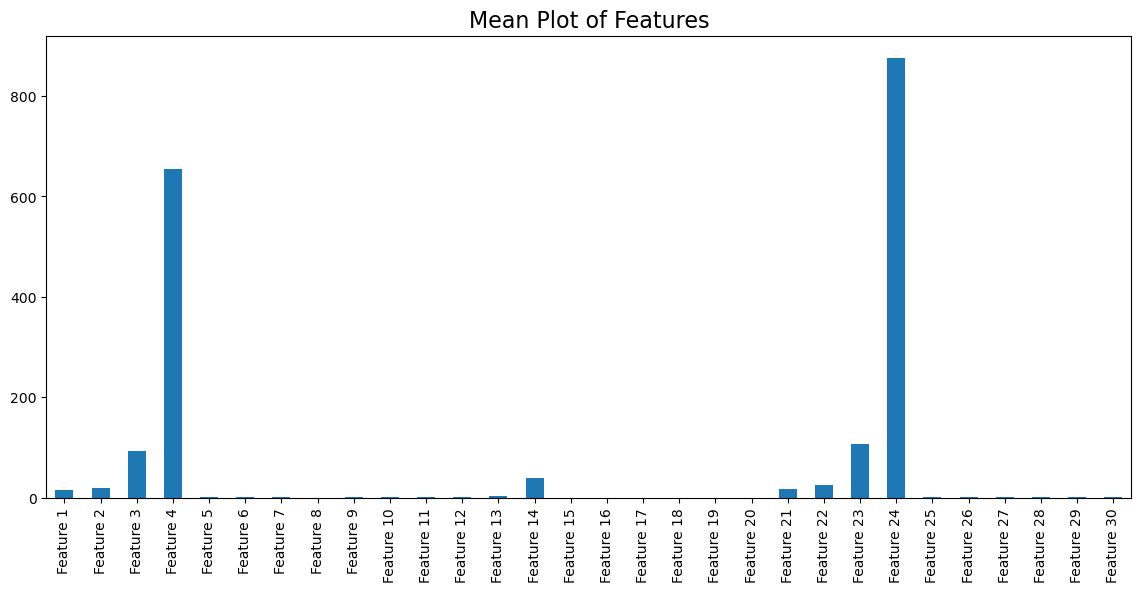

In [24]:
data_mean = x_df_train_4.describe().loc['mean']
data_mean.plot(kind='bar', figsize=(14,6))
plt.title('Mean Plot of Features', fontsize=16)
plt.show()

### Data normalization is required for this dataset so we can have the values of all the features in the same range

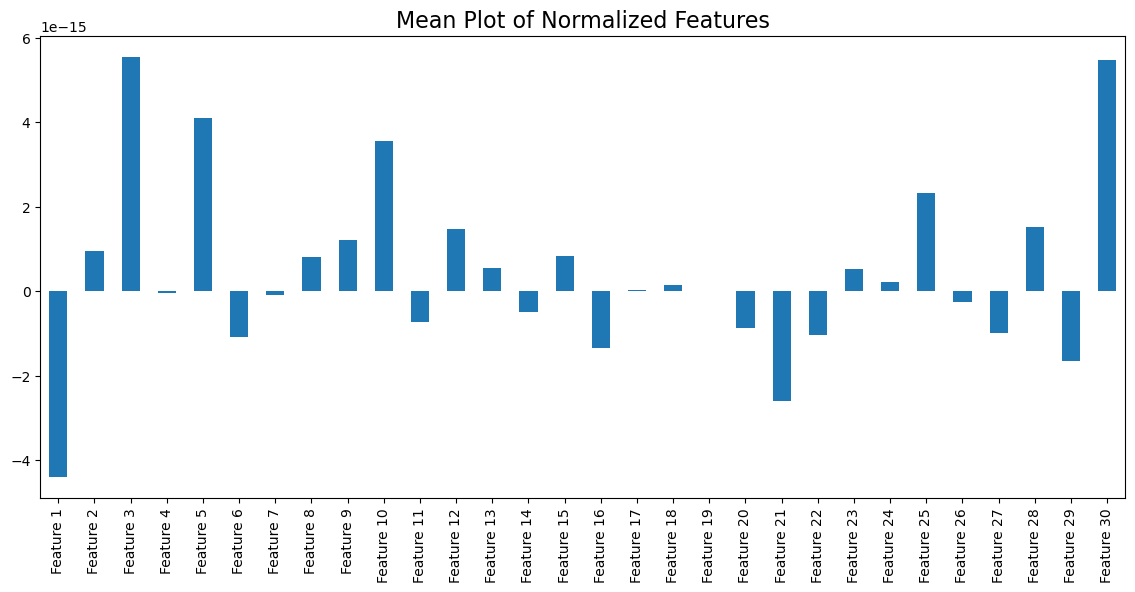

In [25]:
std_scaler = StandardScaler()
x_df_train_4_normalized = pd.DataFrame(std_scaler.fit_transform(x_df_train_4), columns=x_df_train_4.columns)
data_mean = x_df_train_4_normalized.describe().loc['mean']
data_mean.plot(kind='bar', figsize=(14,6))
plt.title('Mean Plot of Normalized Features', fontsize=16)
plt.show()

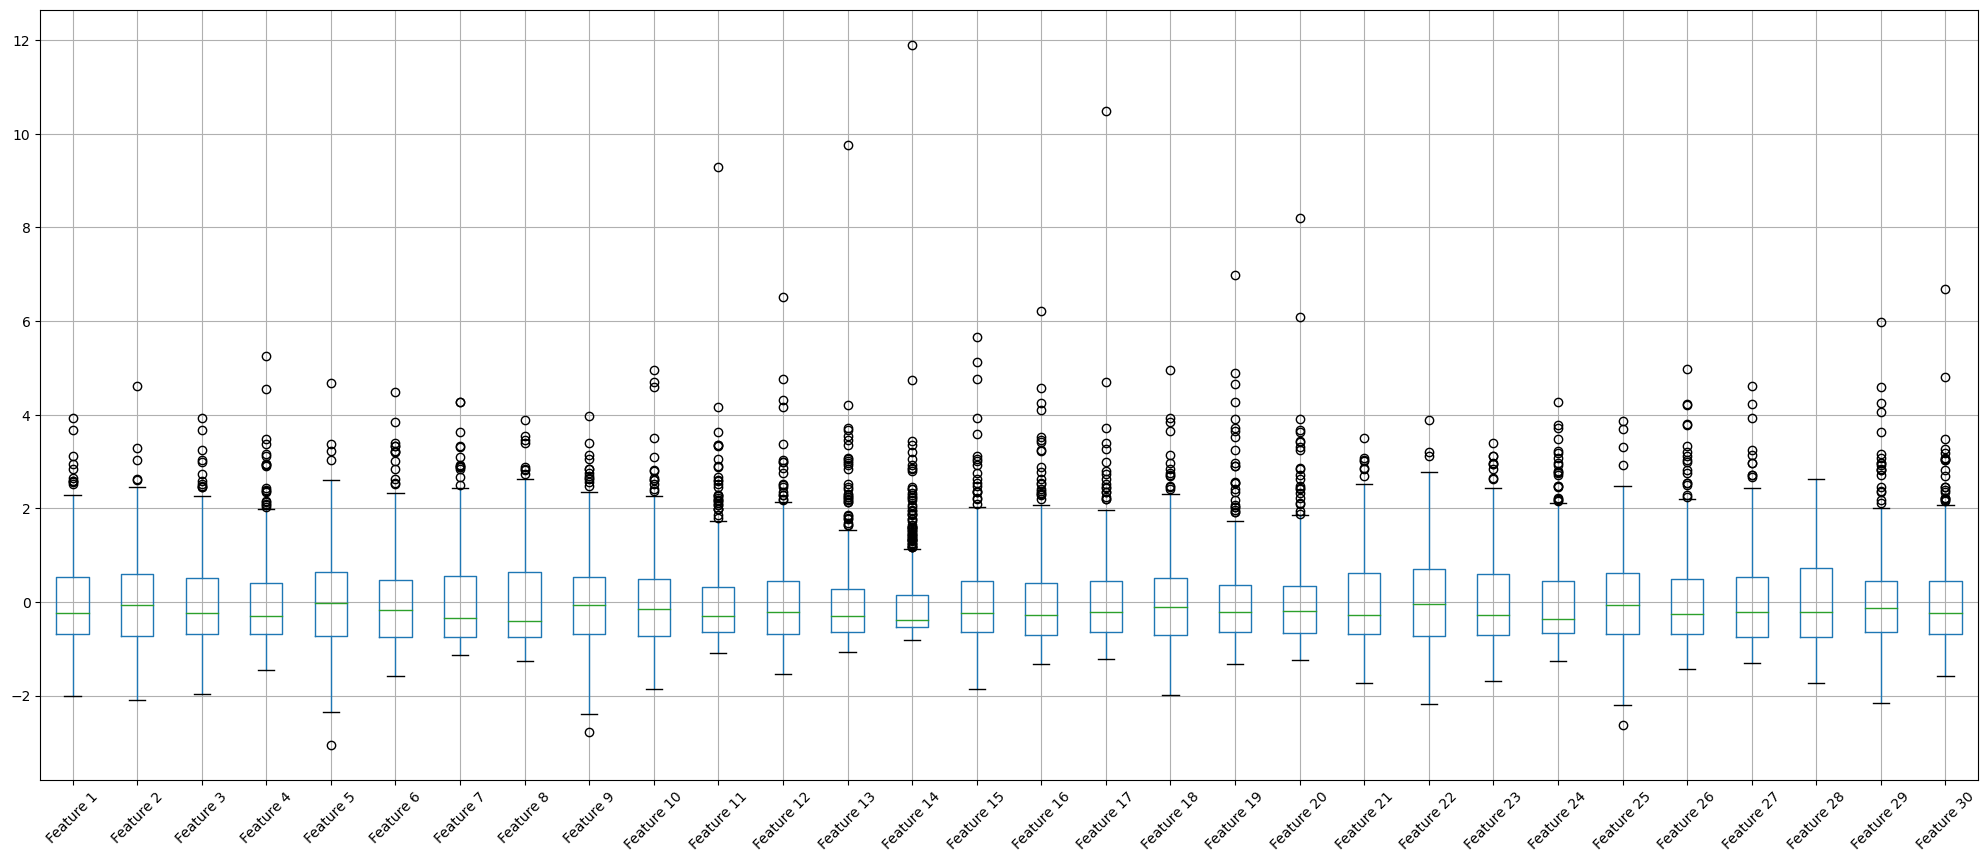

In [26]:
plt.rcParams["figure.figsize"] = [25, 10]
ax = x_df_train_4_normalized.boxplot(column=column_names[0:30]) 
ax.set_xticklabels(column_names, rotation=45)
plt.show()

In [27]:
def draw_distributions_box_plot(y_df, x_df, start_feature, end_feature):
    '''
    When using hue nesting with a variable that takes two levels, setting split to True will draw half of a violin for each level. 
    This can make it easier to directly compare the distributions.
    inner="quart" will draw the quartiles of the distribution
    '''
    data = pd.concat([y_df,x_df.iloc[:,start_feature:end_feature]],axis=1)
    data = pd.melt(data,id_vars="Label",
                        var_name="Features",
                        value_name='Value')
    plt.figure(figsize=(10,10))
    sns.violinplot(x="Features", y="Value", hue="Label", data=data,split=True, inner="quart",palette ="Set2") #Draw a combination of boxplot and kernel density estimate.
    plt.xticks(rotation=90)
    plt.show()

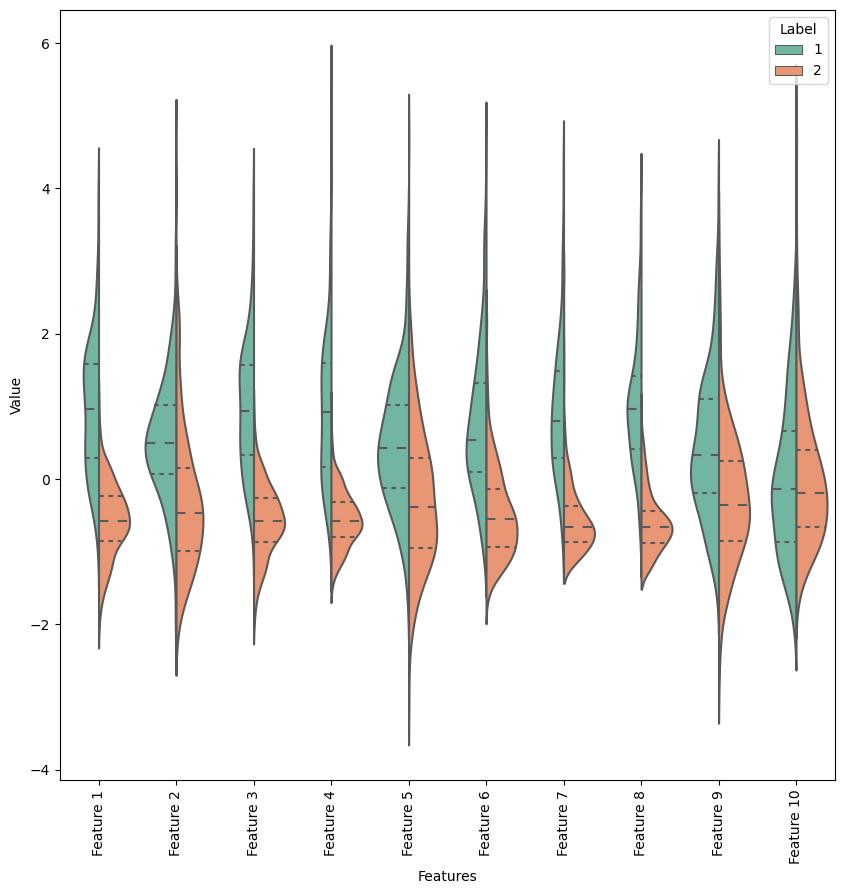

In [28]:
draw_distributions_box_plot(y_df_train_4,x_df_train_4_normalized, start_feature=0, end_feature=10)

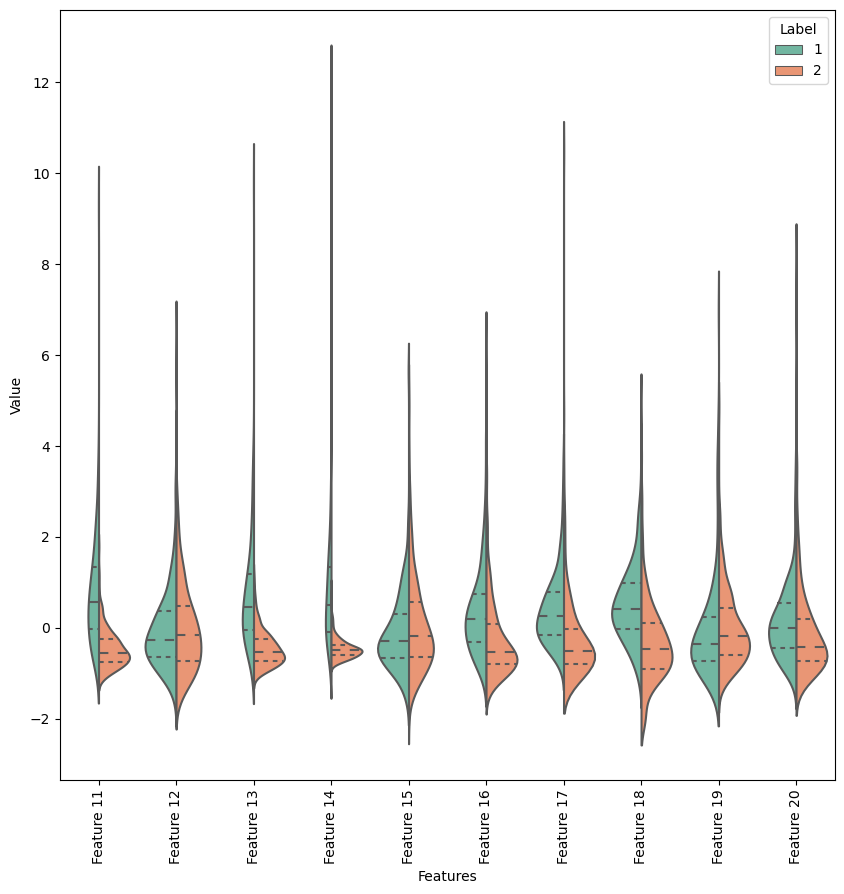

In [29]:
draw_distributions_box_plot(y_df_train_4,x_df_train_4_normalized, start_feature=10, end_feature=20 )

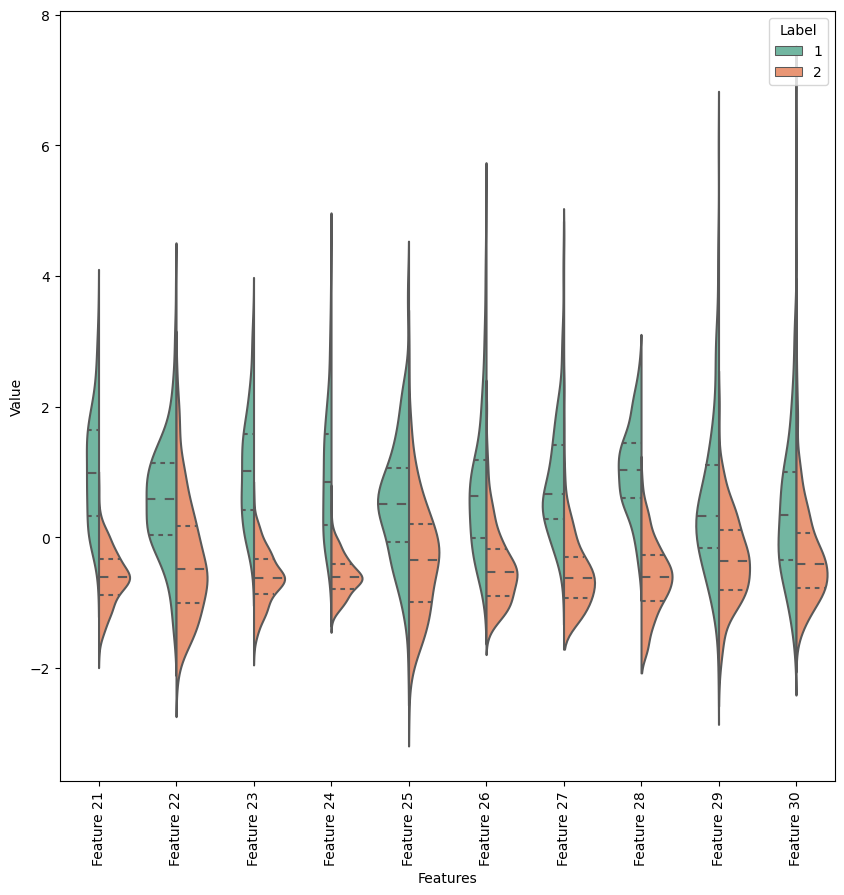

In [30]:
draw_distributions_box_plot(y_df_train_4,x_df_train_4_normalized, start_feature=20, end_feature=31)

In [31]:
def plot_pairplot(y_df, x_df, start_feature, end_feature):
    data = pd.concat([y_df,x_df.iloc[:,start_feature:end_feature]],axis=1)
    grid=sns.pairplot(data=data,kind ="scatter",hue="Label",palette="Set1")
    plt.show()

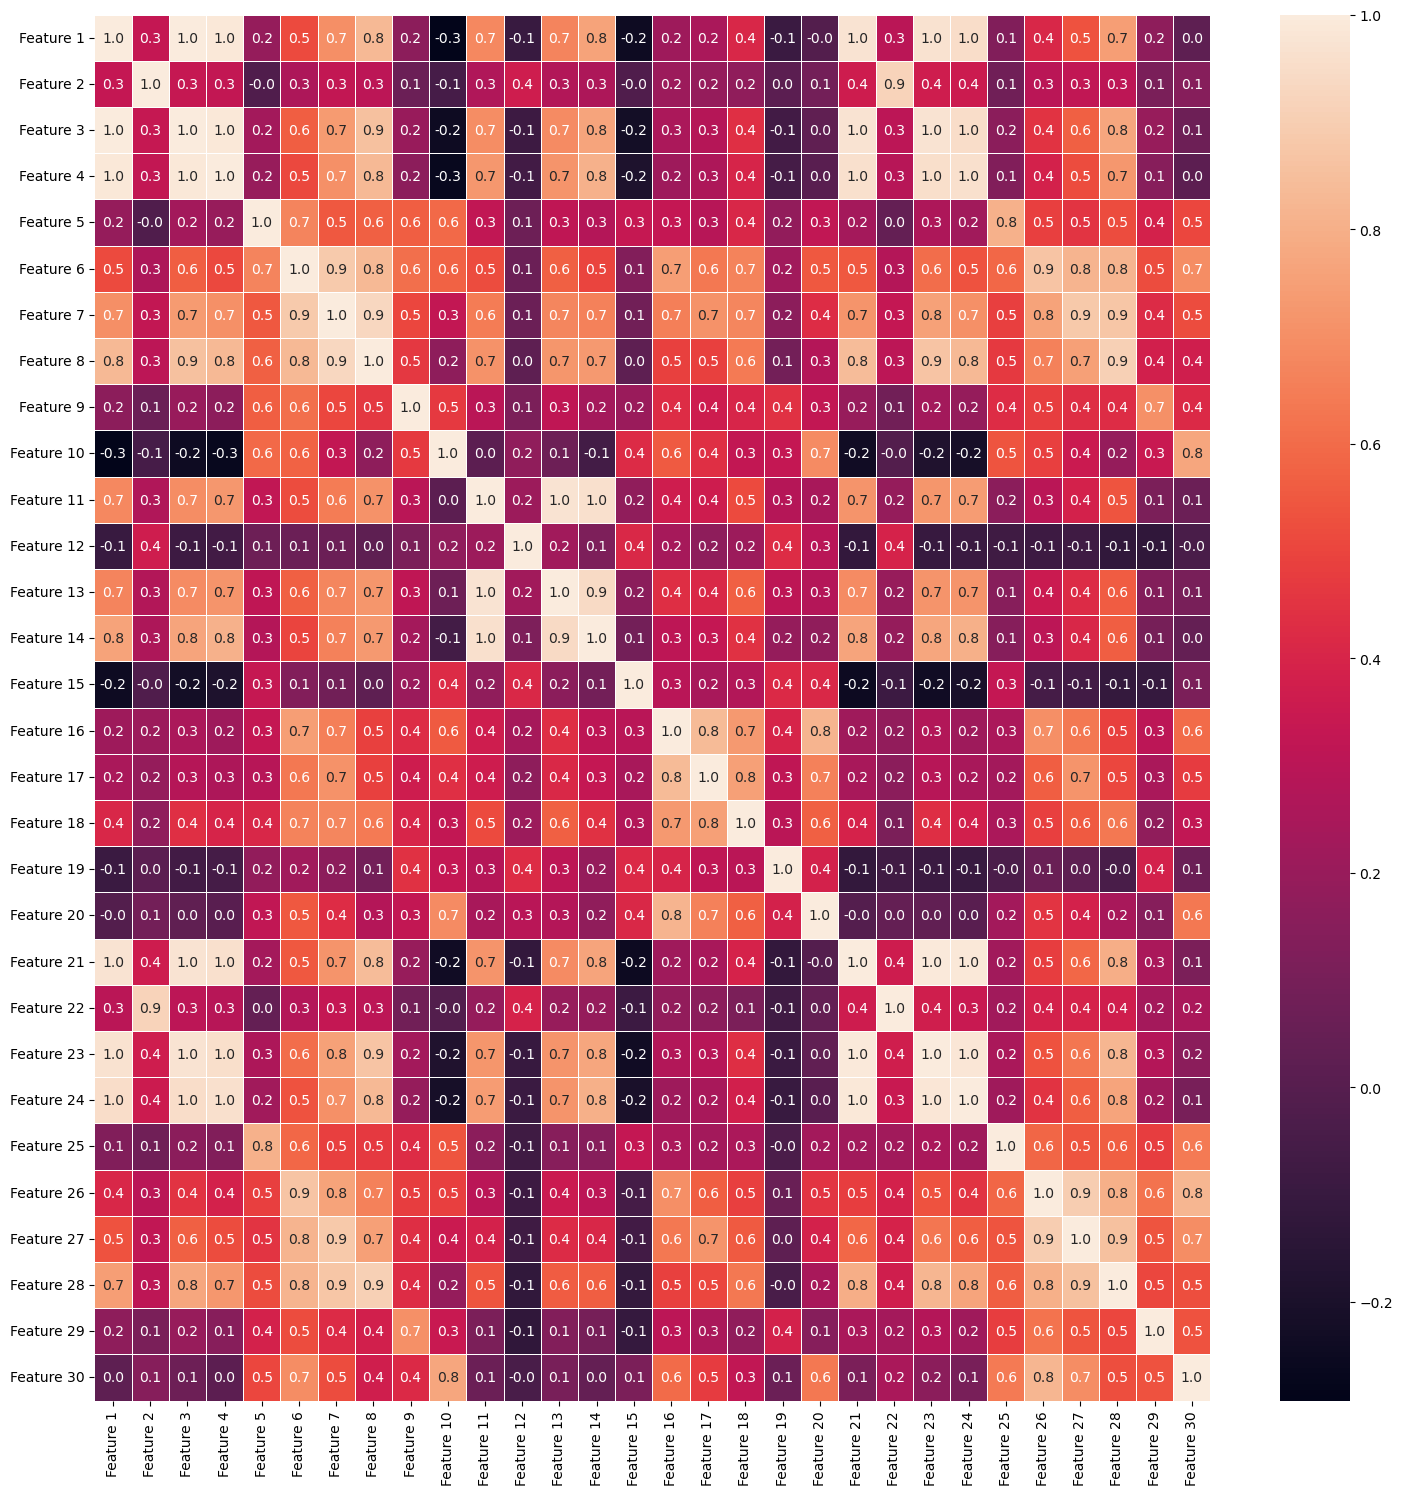

In [32]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x_df_train_4_normalized.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

# regression_synthetic_1.npz

In [34]:
input_file_5 = 'hw2_data/regression_synthetic_1.npz'
npzfile_5 = np.load(input_file_5)
x_train_5, x_test_5, y_train_5, y_test_5 = load_data_npz(npzfile_5, labels_train = "y_train", labels_test = "y_test")

Size of x_train dataset:  (1000, 2)
Size of y_train dataset:  (1000,)
Size of x_test dataset:  (100, 2)
Size of y_test dataset:  (100,)
does x_train contain nan?  False
does x_test contain nan?  False
does y_train contain nan?  False
does y_test contain nan?  False


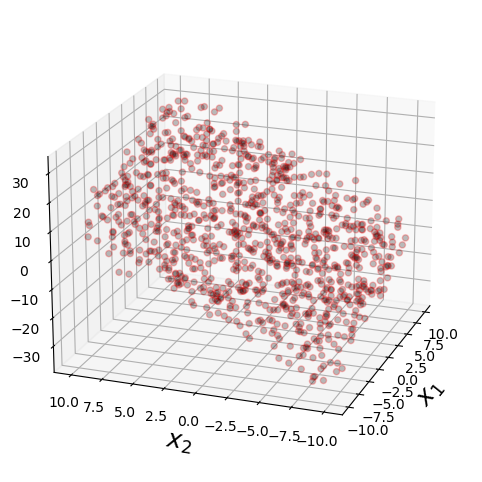

In [35]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
view = [20, 200]
ax.scatter(x_train_5[:,0],x_train_5[:,1],y_train_5,c = 'k',edgecolor = 'r',linewidth = 1,alpha = 0.25)
ax.view_init(view[0],view[1])
ax.set_xlabel(r'$x_1$',fontsize = 18,labelpad = 5)
ax.set_ylabel(r'$x_2$',fontsize = 18,labelpad = 5)
ax.set_zlabel(r'$Y$',fontsize = 18,rotation = 90)
plt.show()

# regression_synthetic_2.npz

In [36]:
input_file_6 = 'hw2_data/regression_synthetic_2.npz'
npzfile_6 = np.load(input_file_6)
x_train_6, x_test_6, y_train_6, y_test_6 = load_data_npz(npzfile_6, labels_train = "y_train", labels_test = "y_test")

Size of x_train dataset:  (2000, 2)
Size of y_train dataset:  (2000,)
Size of x_test dataset:  (224, 2)
Size of y_test dataset:  (224,)
does x_train contain nan?  False
does x_test contain nan?  False
does y_train contain nan?  False
does y_test contain nan?  False


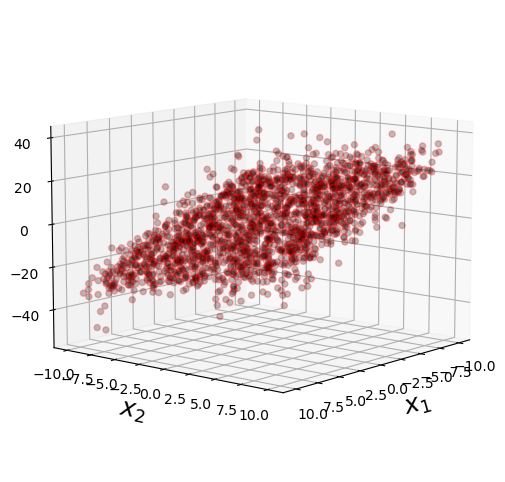

In [37]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
view = [10, 40]
ax.scatter(x_train_6[:,0],x_train_6[:,1],y_train_6, c = 'k', edgecolor = 'r', linewidth = 1, alpha = 0.25)
ax.view_init(view[0],view[1])
ax.set_xlabel(r'$x_1$',fontsize = 18,labelpad = 5)
ax.set_ylabel(r'$x_2$',fontsize = 18,labelpad = 5)
ax.set_zlabel(r'$Y$',fontsize = 18,rotation = 90)
plt.show()